# Statistiques Descriptives sur la nouvelle base `Database.csv`

Le référant nous a fourni une nouvelle base faisant correspondre les données des FQMs aux données réalisées. Il nous demande de la filtrer pour ne garder que ` Terrain = 'ORLY'`.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
database = pd.read_csv("DATABASE.csv",low_memory=False,decimal=',')

In [48]:
database.tail(5)

Unnamed: 0        Date       Faisceau       Pays  \
6576302     6576302  2016-12-31       Schengen    ESPAGNE   
6576303     6576303  2016-12-31  International      MAROC   
6576304     6576304  2016-12-31  International     BRESIL   
6576305     6576305  2016-12-30       National     FRANCE   
6576306     6576306  2016-12-31       Schengen  ALLEMAGNE   

                            Ville Terrain Terminal Aerog  \
6576302                 Barcelone     CDG      T2F  CDG2   
6576303                Rabat Sale    ORLY     ORYS  ORYS   
6576304  Sao Paulo Guarulhos Intl     CDG       T1  CDG1   
6576305          Toulouse Blagnac    ORLY     ORYW  ORYO   
6576306                 Nuremberg     CDG      T2G  CDG2   

                            Aerop Code Aerop  ... Code Cie   ArrDep   NumVol  \
6576302                 Barcelone       LEBL  ...      AFR   Départ  AFR1148   
6576303                Rabat Sale       GMME  ...      RAM   Départ   RAM783   
6576304  Sao Paulo Guarulhos Intl       SBGR  ...      TAM  Arrivée  TAM8108   
6576305          Toulouse Blagnac       LFBO  ...      AFR  Arrivée  AFR6131   
6576306                 Nuremberg       EDDN  ...      AFR  Arrivée  AFR1311   

        TypAv MVT  PAX  Date Equiv MVT_FQM  PAX_FQM  Coeff_Rempl_FQM  
6576302   321   1  164         NaN     NaN      NaN              NaN  
6576303   73H   1  101  2011-12-31     1.0    100.1             0.55  
6576304   77W   1  363         NaN     NaN      NaN              NaN  
6576305   321   1   75  2015-01-02     1.0    142.4             0.80  
6576306   E70   1   74         NaN     NaN      NaN              NaN  

[5 rows x 21 columns]

In [49]:
database.columns

Index(['Unnamed: 0', 'Date', 'Faisceau', 'Pays', 'Ville', 'Terrain',
       'Terminal', 'Aerog', 'Aerop', 'Code Aerop', 'Cie', 'Code Cie', 'ArrDep',
       'NumVol', 'TypAv', 'MVT', 'PAX', 'Date Equiv', 'MVT_FQM', 'PAX_FQM',
       'Coeff_Rempl_FQM'],
      dtype='object')

In [50]:
database = database.astype({'Date': 'datetime64[ns]'})

In [51]:
database_orly = database[database['Terrain'].isin(['ORLY'])]

## Problèmes de la base : 
- Manque sièges estimés par les FQMs --> essayer d'utiliser les bases de référence 
- Quelle est la signification de `MVT_FQM` et `MVT` ? les seules modalités sont 1 (et NaN pour `MVT_FQM`) :

In [52]:
database_orly[['MVT_FQM']].drop_duplicates()

MVT_FQM
0            NaN
5170377      1.0

## Représentations graphiques du nombre de passagers journalier :

In [54]:
faisceaux = ['National','International','Schengen','Autre UE','Dom Tom']

database_orly_depart = database_orly[database_orly['ArrDep'].isin(['Départ'])]
database_orly_arrivee = database_orly[database_orly['ArrDep'].isin(['Arrivée'])]

Text(0.5, 0.98, 'Comparaison entre nombre de passagers réalisés et estimés par jour (somme) sur chaque faisceau, en fonction du type de mouvement :')

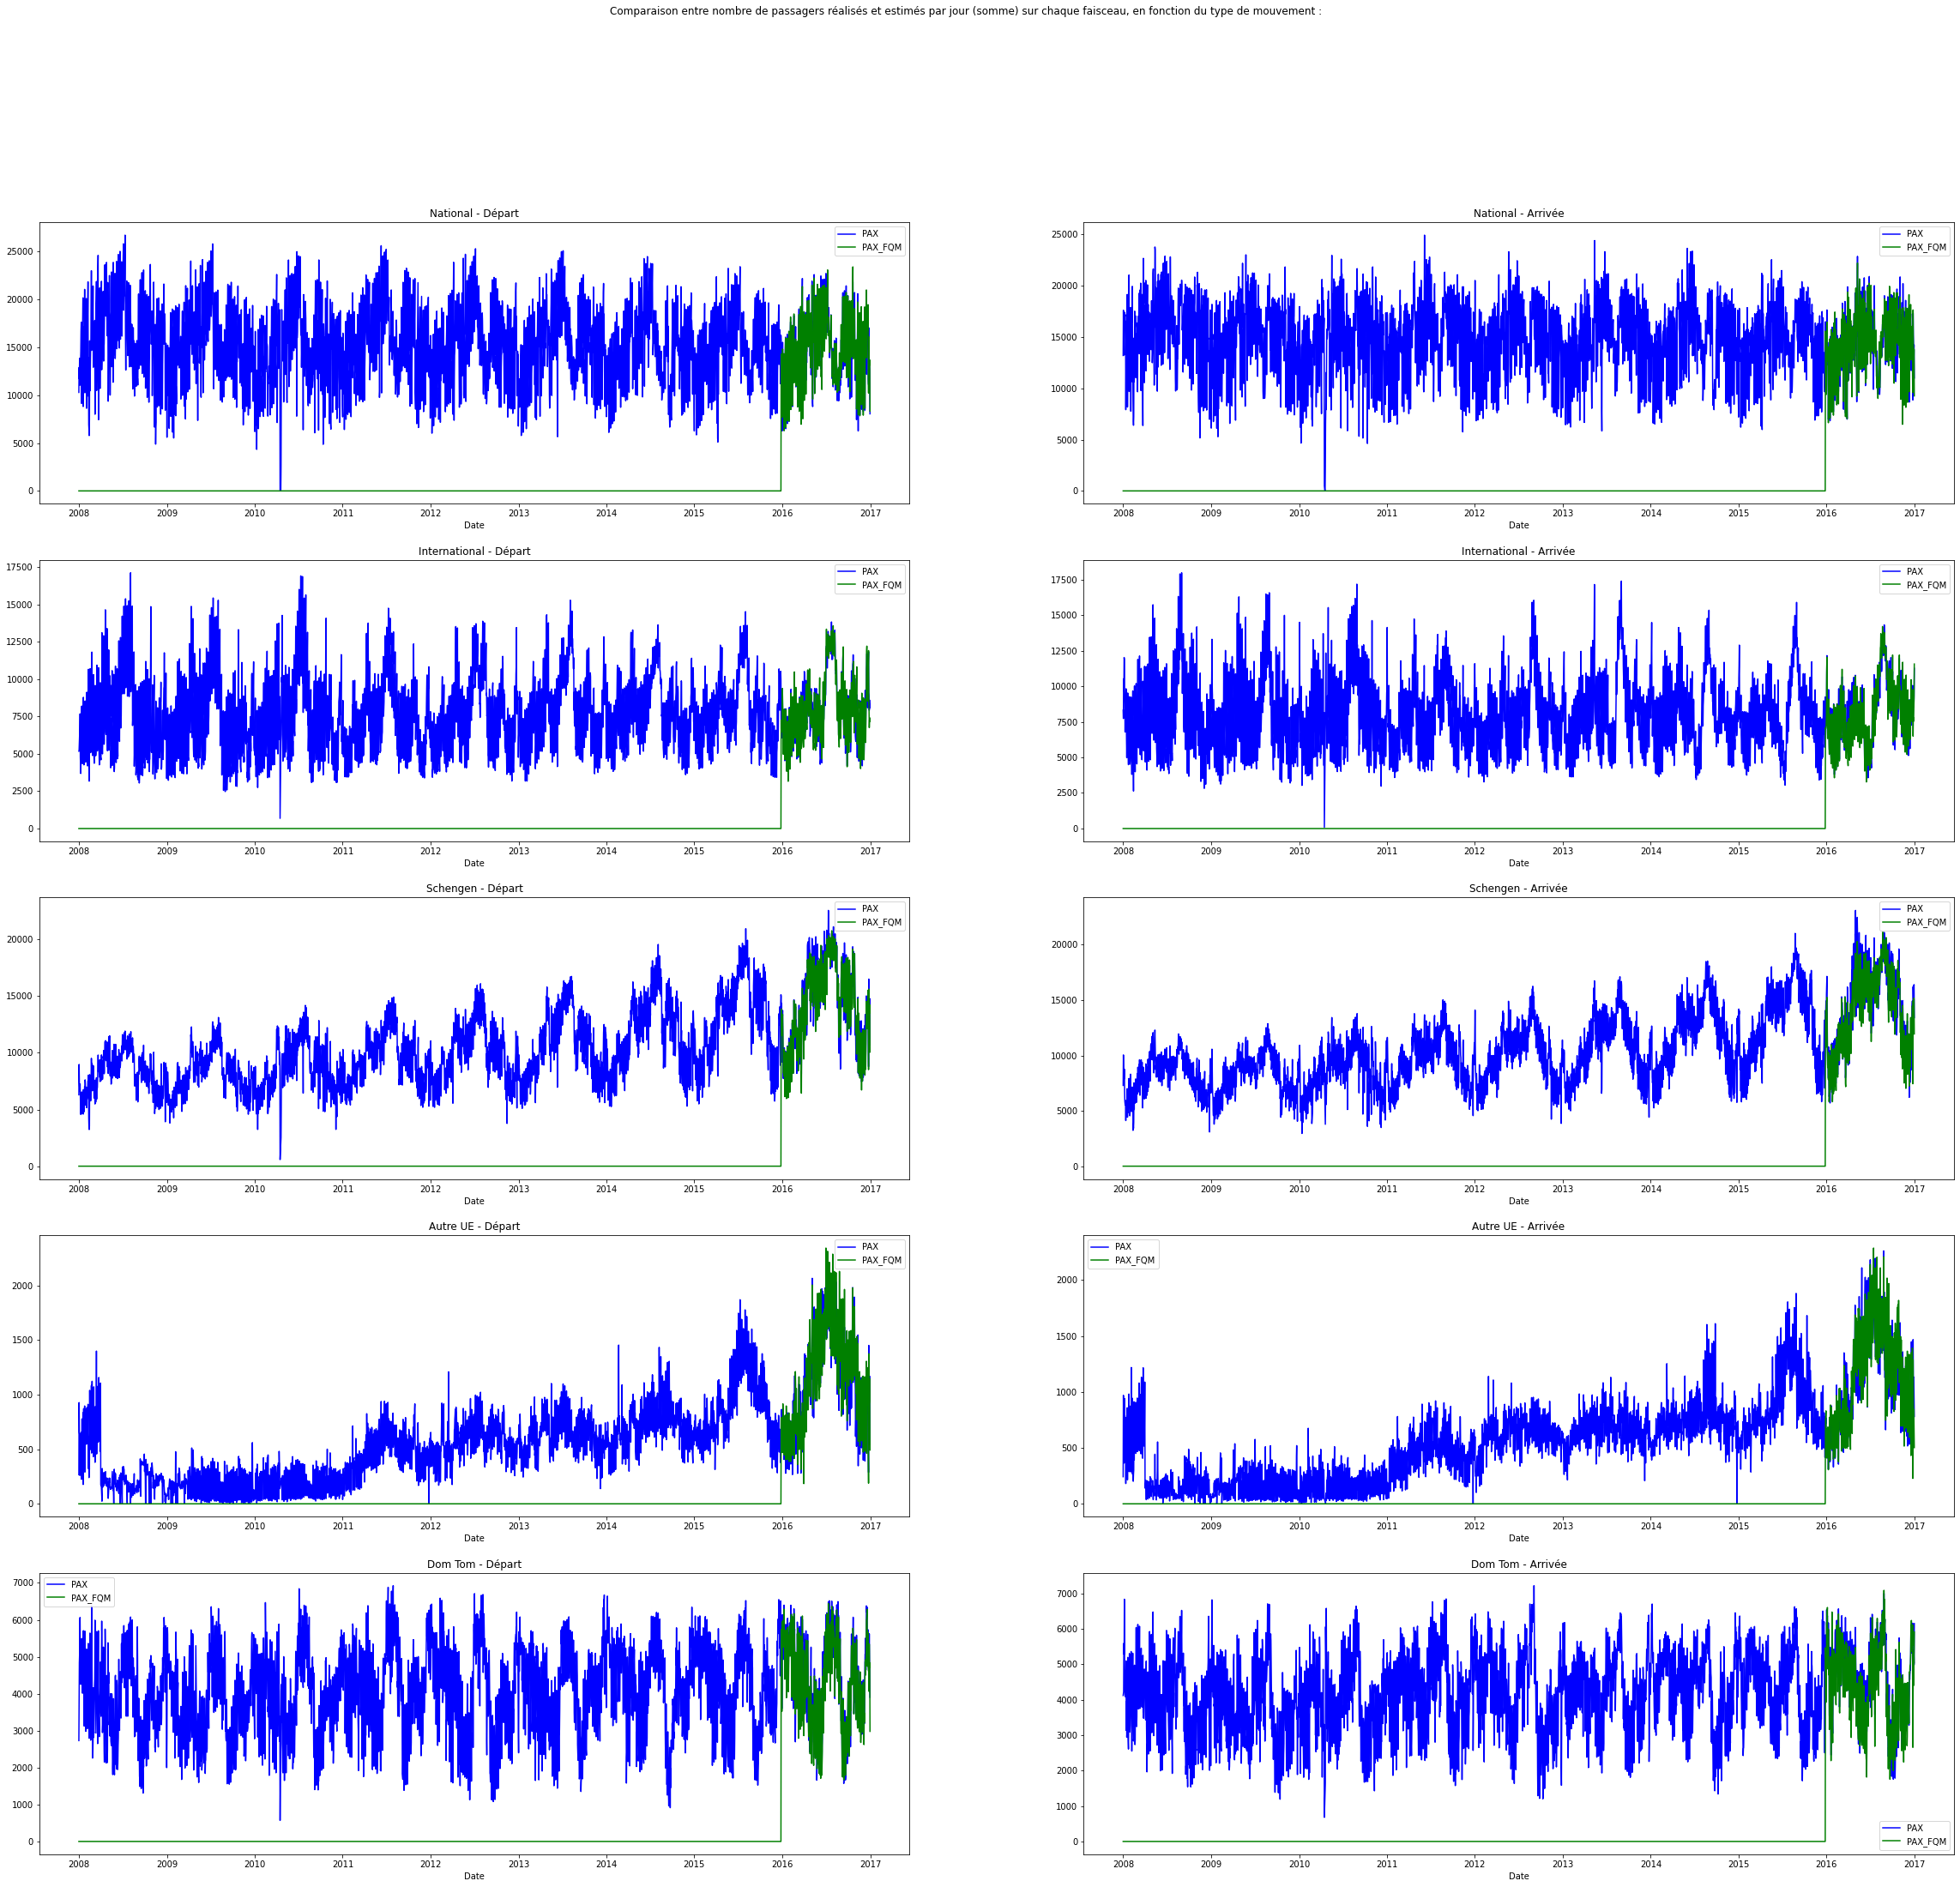

In [56]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    database_orly_depart[database_orly_depart['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    database_orly_depart[database_orly_depart['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX_FQM':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    database_orly_arrivee[database_orly_arrivee['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    database_orly_arrivee[database_orly_arrivee['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX_FQM':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
fig.suptitle('Comparaison entre nombre de passagers réalisés et estimés par jour (somme) sur chaque faisceau, en fonction du type de mouvement :')

Les FQMs ne sont remplis qu'entre 2016 et 2017. On ne va représenter que cette partie : 

In [59]:
database_orly2 = database_orly[database_orly['Date']>np.datetime64('2015-12-31')]

In [62]:
database_orly2.count()

Unnamed: 0         237620
Date               237620
Faisceau           237619
Pays               237620
Ville              237620
Terrain            237620
Terminal           237620
Aerog              237620
Aerop              237620
Code Aerop         237620
Cie                237620
Code Cie           237620
ArrDep             237620
NumVol             237620
TypAv              237620
MVT                237620
PAX                237620
Date Equiv         232710
MVT_FQM            232710
PAX_FQM            232710
Coeff_Rempl_FQM    232710
dtype: int64

#### Il subsiste qqs valeurs manquantes (1 faisceau et surtout 4 910 FQMs...)

In [60]:
database_orly_depart2 = database_orly2[database_orly2['ArrDep'].isin(['Départ'])]
database_orly_arrivee2 = database_orly2[database_orly2['ArrDep'].isin(['Arrivée'])]

Text(0.5, 0.98, 'Comparaison entre nombre de passagers réalisés et estimés par jour (somme) en 2016 sur chaque faisceau, en fonction du type de mouvement :')

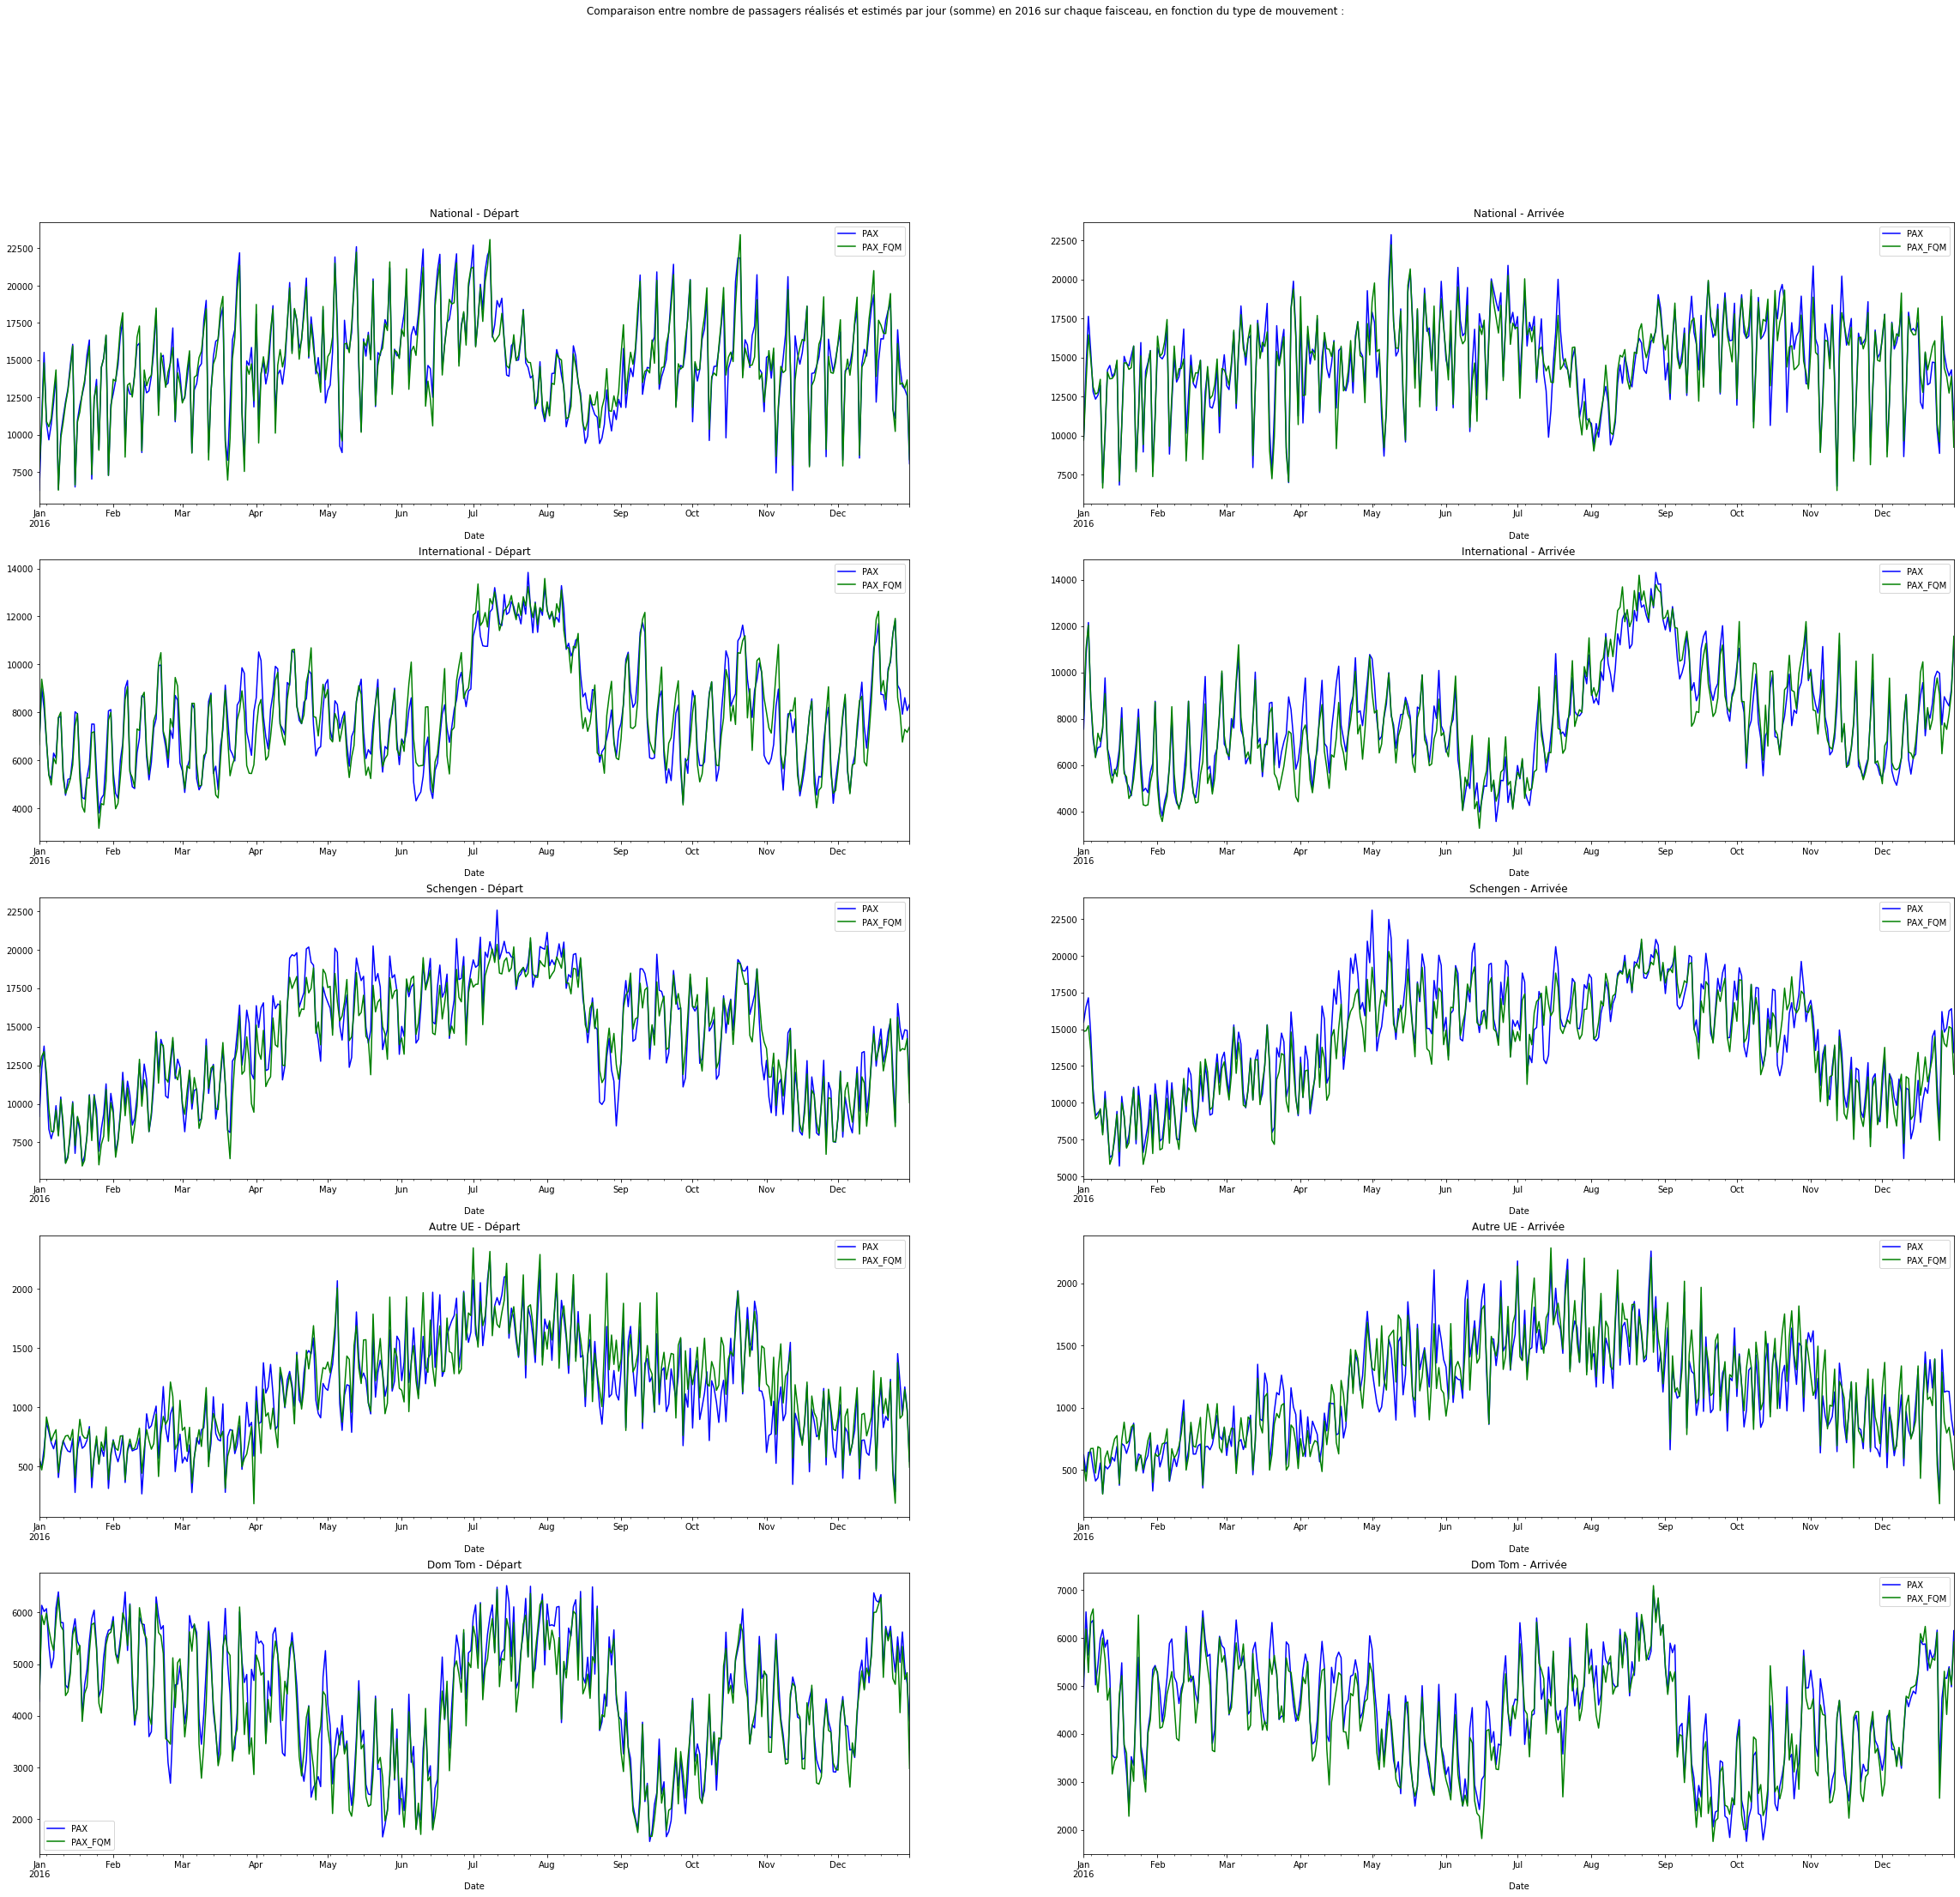

In [87]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    database_orly_depart2[database_orly_depart2['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    database_orly_depart2[database_orly_depart2['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX_FQM':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    database_orly_arrivee2[database_orly_arrivee2['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    database_orly_arrivee2[database_orly_arrivee2['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX_FQM':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
fig.suptitle('Comparaison entre nombre de passagers réalisés et estimés par jour (somme) en 2016 sur chaque faisceau, en fonction du type de mouvement :')

## Tentative ajout du nombre de sièges par type avion à partir de notre base de référence :

In [69]:
base_ref = pd.read_csv("base_ref_2.csv")
base_ref.drop(['Unnamed: 0'], axis='columns', inplace=True)
base_ref.rename(columns={'Tav':'TypAv'}, inplace=True)

In [70]:
base_ref.tail()

TypAv  Sièges Corrections_ICI
54   E90               99.927438
55   E95              121.994280
56   ER4               49.873021
57   F50               50.000000
58   IL9              262.000000

In [71]:
database_orly3 = database_orly.merge(base_ref,how='left', on=["TypAv"])

In [72]:
database_orly3.tail()

Unnamed: 0       Date       Faisceau               Pays  \
2078041     6576297 2016-12-30  International            ALGERIE   
2078042     6576299 2016-12-31        Dom Tom  FRANCE GUADELOUPE   
2078043     6576300 2016-12-30       National             FRANCE   
2078044     6576303 2016-12-31  International              MAROC   
2078045     6576305 2016-12-30       National             FRANCE   

                            Ville Terrain Terminal Aerog  \
2078041        Annaba Les Salines    ORLY     ORYS  ORYS   
2078042  Pointe à Pitre Le Raizet    ORLY     ORYW  ORYO   
2078043                  Biarritz    ORLY     ORYW  ORYO   
2078044                Rabat Sale    ORLY     ORYS  ORYS   
2078045          Toulouse Blagnac    ORLY     ORYW  ORYO   

                            Aerop Code Aerop  ...   ArrDep   NumVol TypAv MVT  \
2078041        Annaba Les Salines       DABB  ...   Départ  DAH1115   73H   1   
2078042  Pointe à Pitre Le Raizet       TFFR  ...   Départ   AFR792   77W   1   
2078043                  Biarritz       LFBZ  ...  Arrivée  AFR7487   319   1   
2078044                Rabat Sale       GMME  ...   Départ   RAM783   73H   1   
2078045          Toulouse Blagnac       LFBO  ...  Arrivée  AFR6131   321   1   

         PAX  Date Equiv  MVT_FQM PAX_FQM  Coeff_Rempl_FQM  \
2078041  113  2011-12-30      1.0  102.06             0.63   
2078042  389  2015-12-31      1.0  283.20             0.60   
2078043  145  2015-01-02      1.0  142.40             0.80   
2078044  101  2011-12-31      1.0  100.10             0.55   
2078045   75  2015-01-02      1.0  142.40             0.80   

         Sièges Corrections_ICI  
2078041              188.563462  
2078042              472.000000  
2078043              139.561067  
2078044              188.563462  
2078045              203.635683  

[5 rows x 22 columns]

In [73]:
database_orly3.count()

Unnamed: 0                2078046
Date                      2078046
Faisceau                  2077205
Pays                      2078046
Ville                     2078046
Terrain                   2078046
Terminal                  2078046
Aerog                     2078046
Aerop                     2078046
Code Aerop                2076391
Cie                       2074533
Code Cie                  2074533
ArrDep                    2078046
NumVol                    2074533
TypAv                     2078008
MVT                       2078046
PAX                       2078046
Date Equiv                 234990
MVT_FQM                    234990
PAX_FQM                    234990
Coeff_Rempl_FQM            234990
Sièges Corrections_ICI    2034834
dtype: int64

#### Cette fois, la base de référence nous permet de compléter la base totale de manière très satisfaisante (seulement 43 212 valeurs manquantes, ce qui représente 2,08% de la base)

Text(0.5, 0.98, 'Répartition des différences entre nombre de sièges estimés et passagers réalisés (pour les valeurs renseignées)')

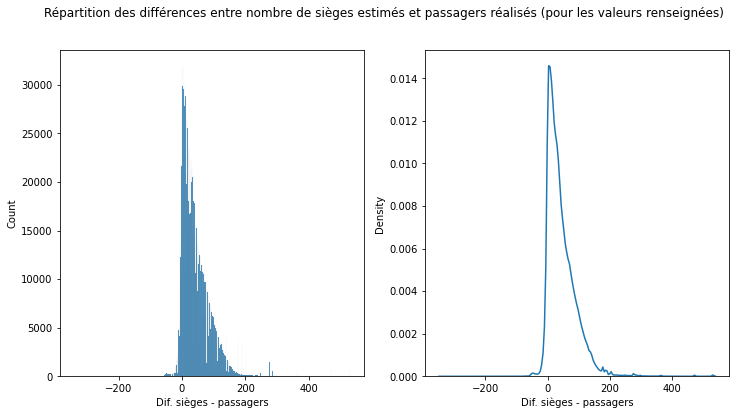

In [75]:
database_orly3['Dif. sièges - passagers'] = database_orly3['Sièges Corrections_ICI'] - database_orly3['PAX']

fig,ax = plt.subplots(1, 2, figsize=(12,6)) 

sns.histplot(data=database_orly3,x='Dif. sièges - passagers',ax=ax[0])
sns.kdeplot(data=database_orly3,x='Dif. sièges - passagers',ax=ax[1])

fig.suptitle("Répartition des différences entre nombre de sièges estimés et passagers réalisés (pour les valeurs renseignées)")

#### On a des répartitions des différences entre nombre de passager et nombre de sièges beaucoup plus cohérentes, et majoritairement positives (ce qui est rassurant car indique qu'il y a plus de sièges que de passagers)

## Représentations graphiques des LF% moyens journaliers : 

In [80]:
database_orly3['LF% réalisé'] = database_orly3['PAX']/database_orly3['Sièges Corrections_ICI']

In [81]:
database_orly3.tail()

Unnamed: 0       Date       Faisceau               Pays  \
2078041     6576297 2016-12-30  International            ALGERIE   
2078042     6576299 2016-12-31        Dom Tom  FRANCE GUADELOUPE   
2078043     6576300 2016-12-30       National             FRANCE   
2078044     6576303 2016-12-31  International              MAROC   
2078045     6576305 2016-12-30       National             FRANCE   

                            Ville Terrain Terminal Aerog  \
2078041        Annaba Les Salines    ORLY     ORYS  ORYS   
2078042  Pointe à Pitre Le Raizet    ORLY     ORYW  ORYO   
2078043                  Biarritz    ORLY     ORYW  ORYO   
2078044                Rabat Sale    ORLY     ORYS  ORYS   
2078045          Toulouse Blagnac    ORLY     ORYW  ORYO   

                            Aerop Code Aerop  ... TypAv MVT  PAX  Date Equiv  \
2078041        Annaba Les Salines       DABB  ...   73H   1  113  2011-12-30   
2078042  Pointe à Pitre Le Raizet       TFFR  ...   77W   1  389  2015-12-31   
2078043                  Biarritz       LFBZ  ...   319   1  145  2015-01-02   
2078044                Rabat Sale       GMME  ...   73H   1  101  2011-12-31   
2078045          Toulouse Blagnac       LFBO  ...   321   1   75  2015-01-02   

        MVT_FQM  PAX_FQM  Coeff_Rempl_FQM Sièges Corrections_ICI  \
2078041     1.0   102.06             0.63             188.563462   
2078042     1.0   283.20             0.60             472.000000   
2078043     1.0   142.40             0.80             139.561067   
2078044     1.0   100.10             0.55             188.563462   
2078045     1.0   142.40             0.80             203.635683   

         Dif. sièges - passagers  LF% réalisé  
2078041                75.563462     0.599268  
2078042                83.000000     0.824153  
2078043                -5.438933     1.038972  
2078044                87.563462     0.535629  
2078045               128.635683     0.368305  

[5 rows x 24 columns]

In [82]:
database_orly_depart3 = database_orly3[database_orly3['ArrDep'].isin(['Départ'])]
database_orly_arrivee3 = database_orly3[database_orly3['ArrDep'].isin(['Arrivée'])]

Text(0.5, 0.98, 'Comparaison entre taux de remplissages réalisés et estimés par jour (somme) sur chaque faisceau, en fonction du type de mouvement :')

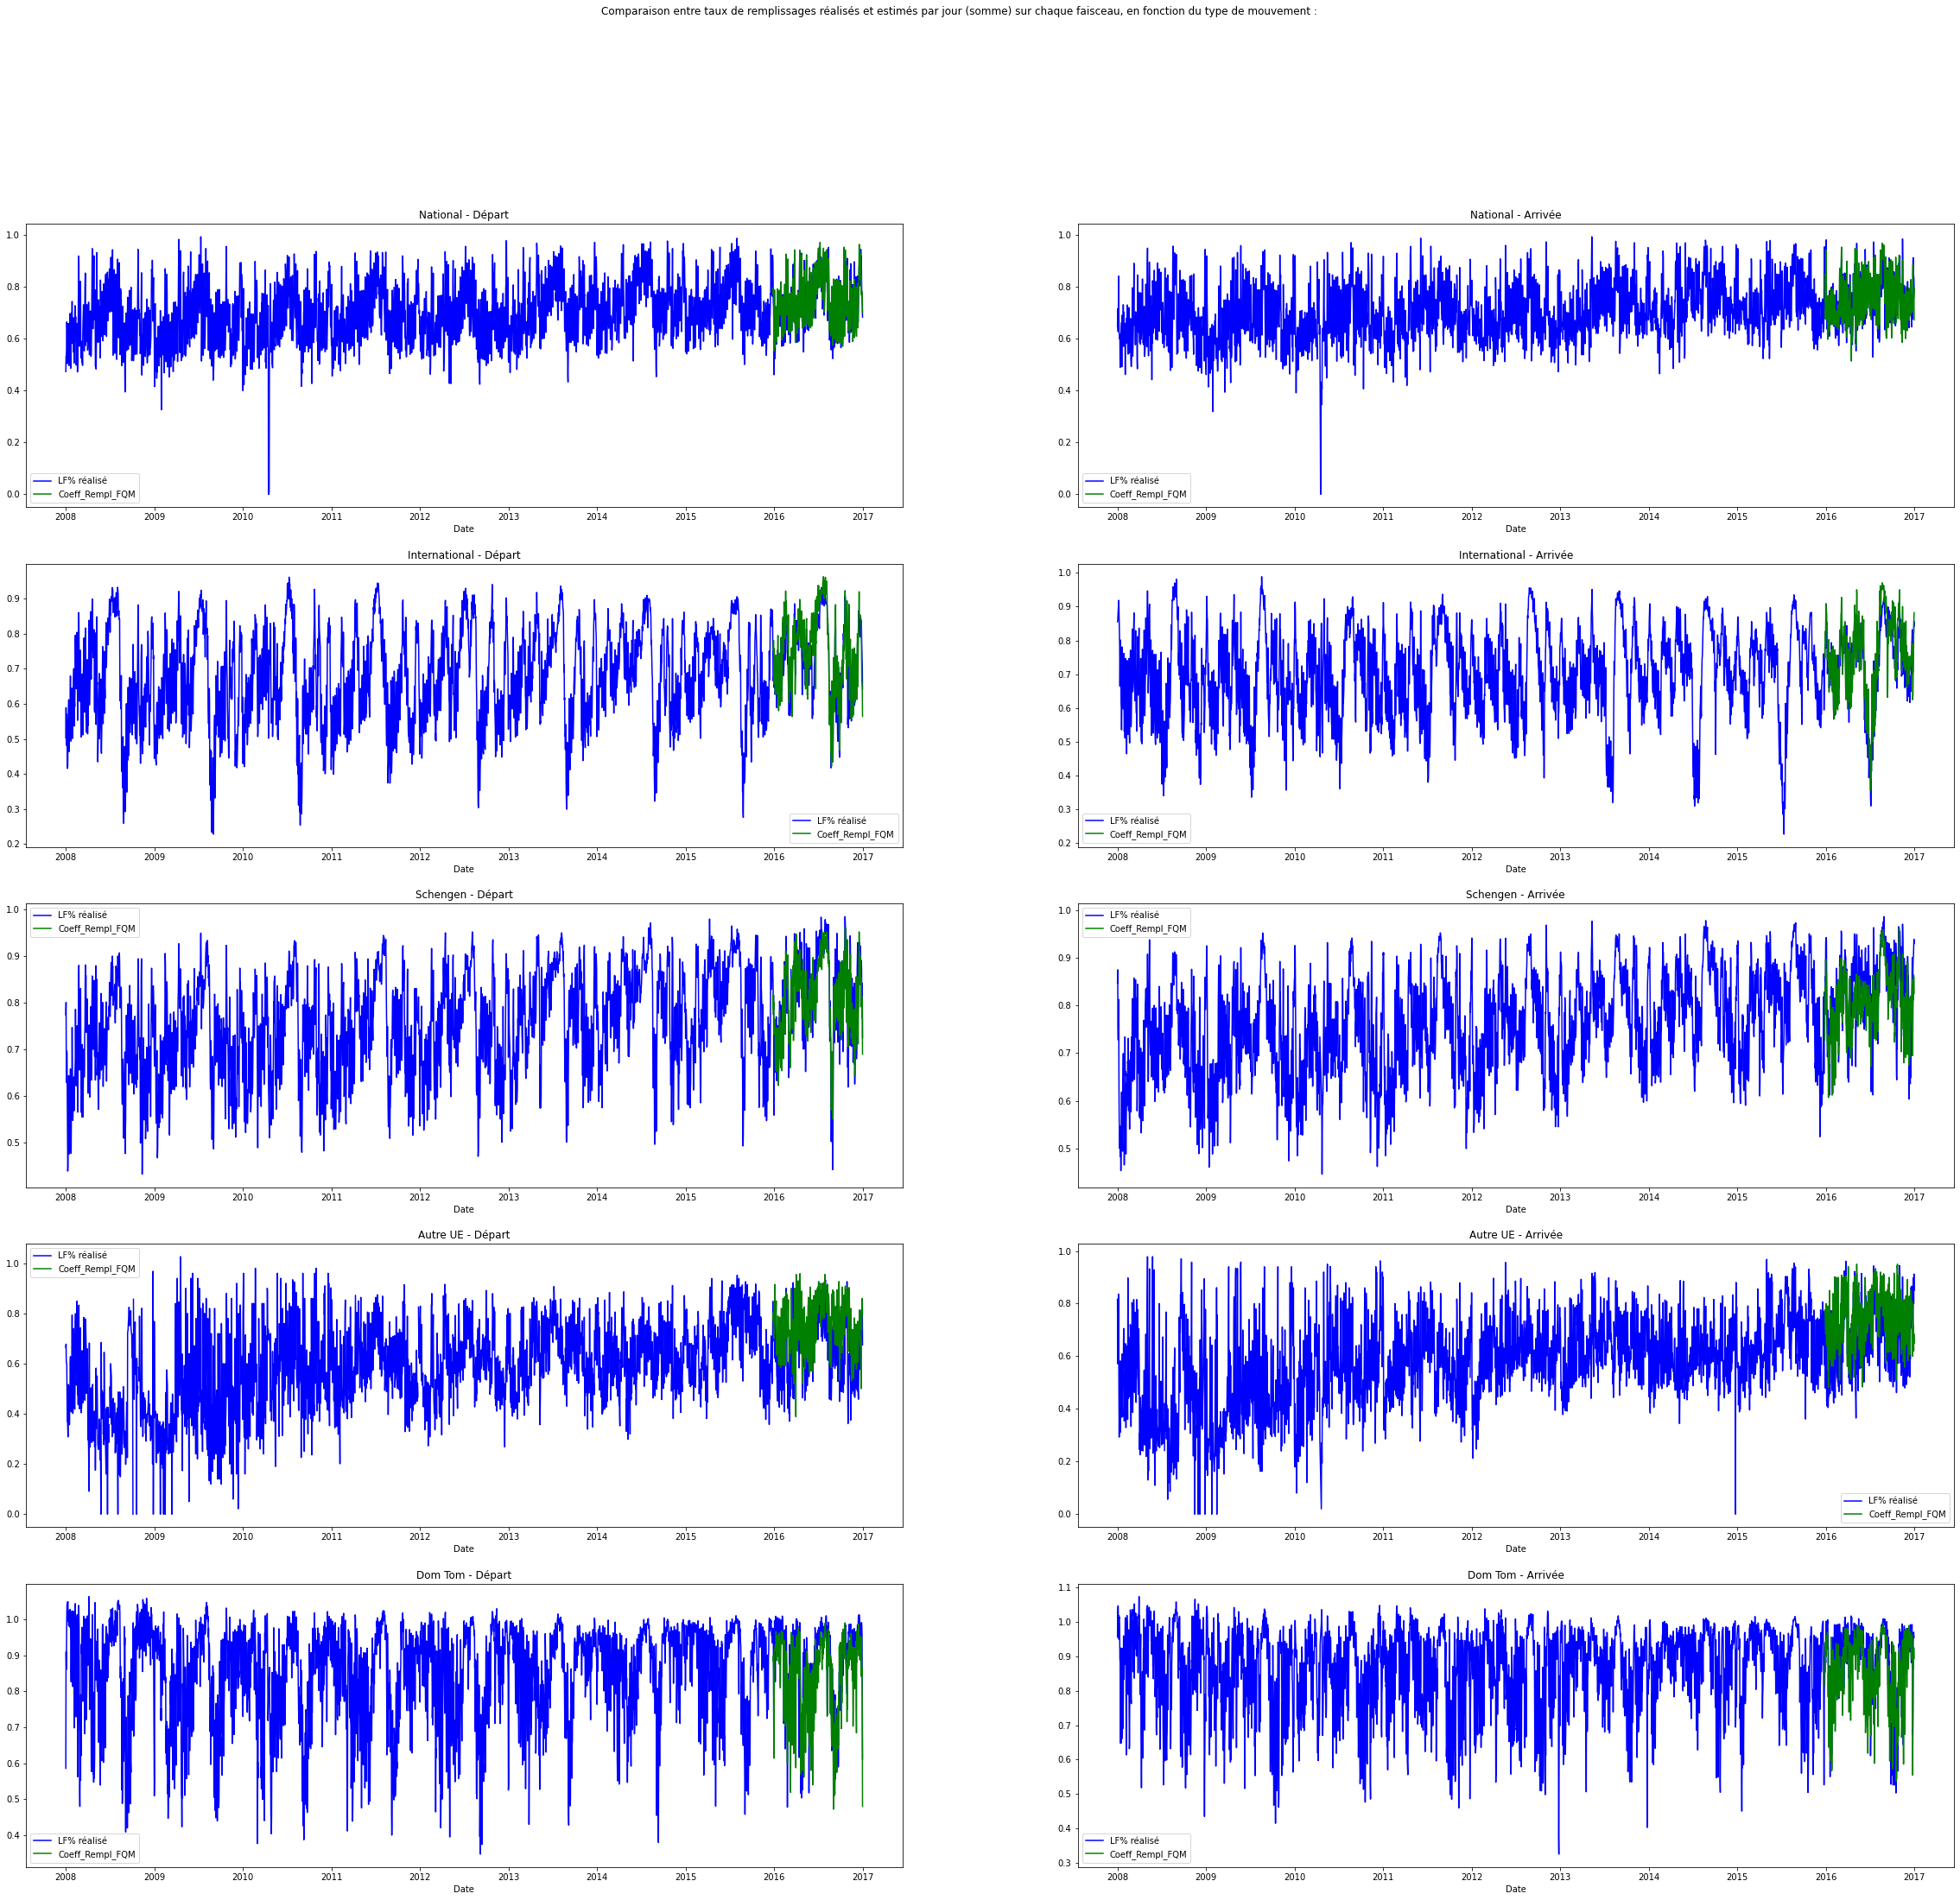

In [88]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    database_orly_depart3[database_orly_depart3['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'LF% réalisé':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    database_orly_depart3[database_orly_depart3['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl_FQM':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    database_orly_arrivee3[database_orly_arrivee3['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'LF% réalisé':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    database_orly_arrivee3[database_orly_arrivee3['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl_FQM':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
fig.suptitle('Comparaison entre taux de remplissages réalisés et estimés par jour (somme) sur chaque faisceau, en fonction du type de mouvement :')

In [84]:
database_orly4 = database_orly3[database_orly3['Date']>np.datetime64('2015-12-31')]

In [85]:
database_orly_depart4 = database_orly4[database_orly3['ArrDep'].isin(['Départ'])]
database_orly_arrivee4 = database_orly4[database_orly3['ArrDep'].isin(['Arrivée'])]

<ipython-input-85-c431ccaed9bc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  database_orly_depart4 = database_orly4[database_orly3['ArrDep'].isin(['Départ'])]
<ipython-input-85-c431ccaed9bc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  database_orly_arrivee4 = database_orly4[database_orly3['ArrDep'].isin(['Arrivée'])]


Text(0.5, 0.98, 'Comparaison entre taux de remplissages réalisés et estimés par jour (somme) en 2016 sur chaque faisceau, en fonction du type de mouvement :')

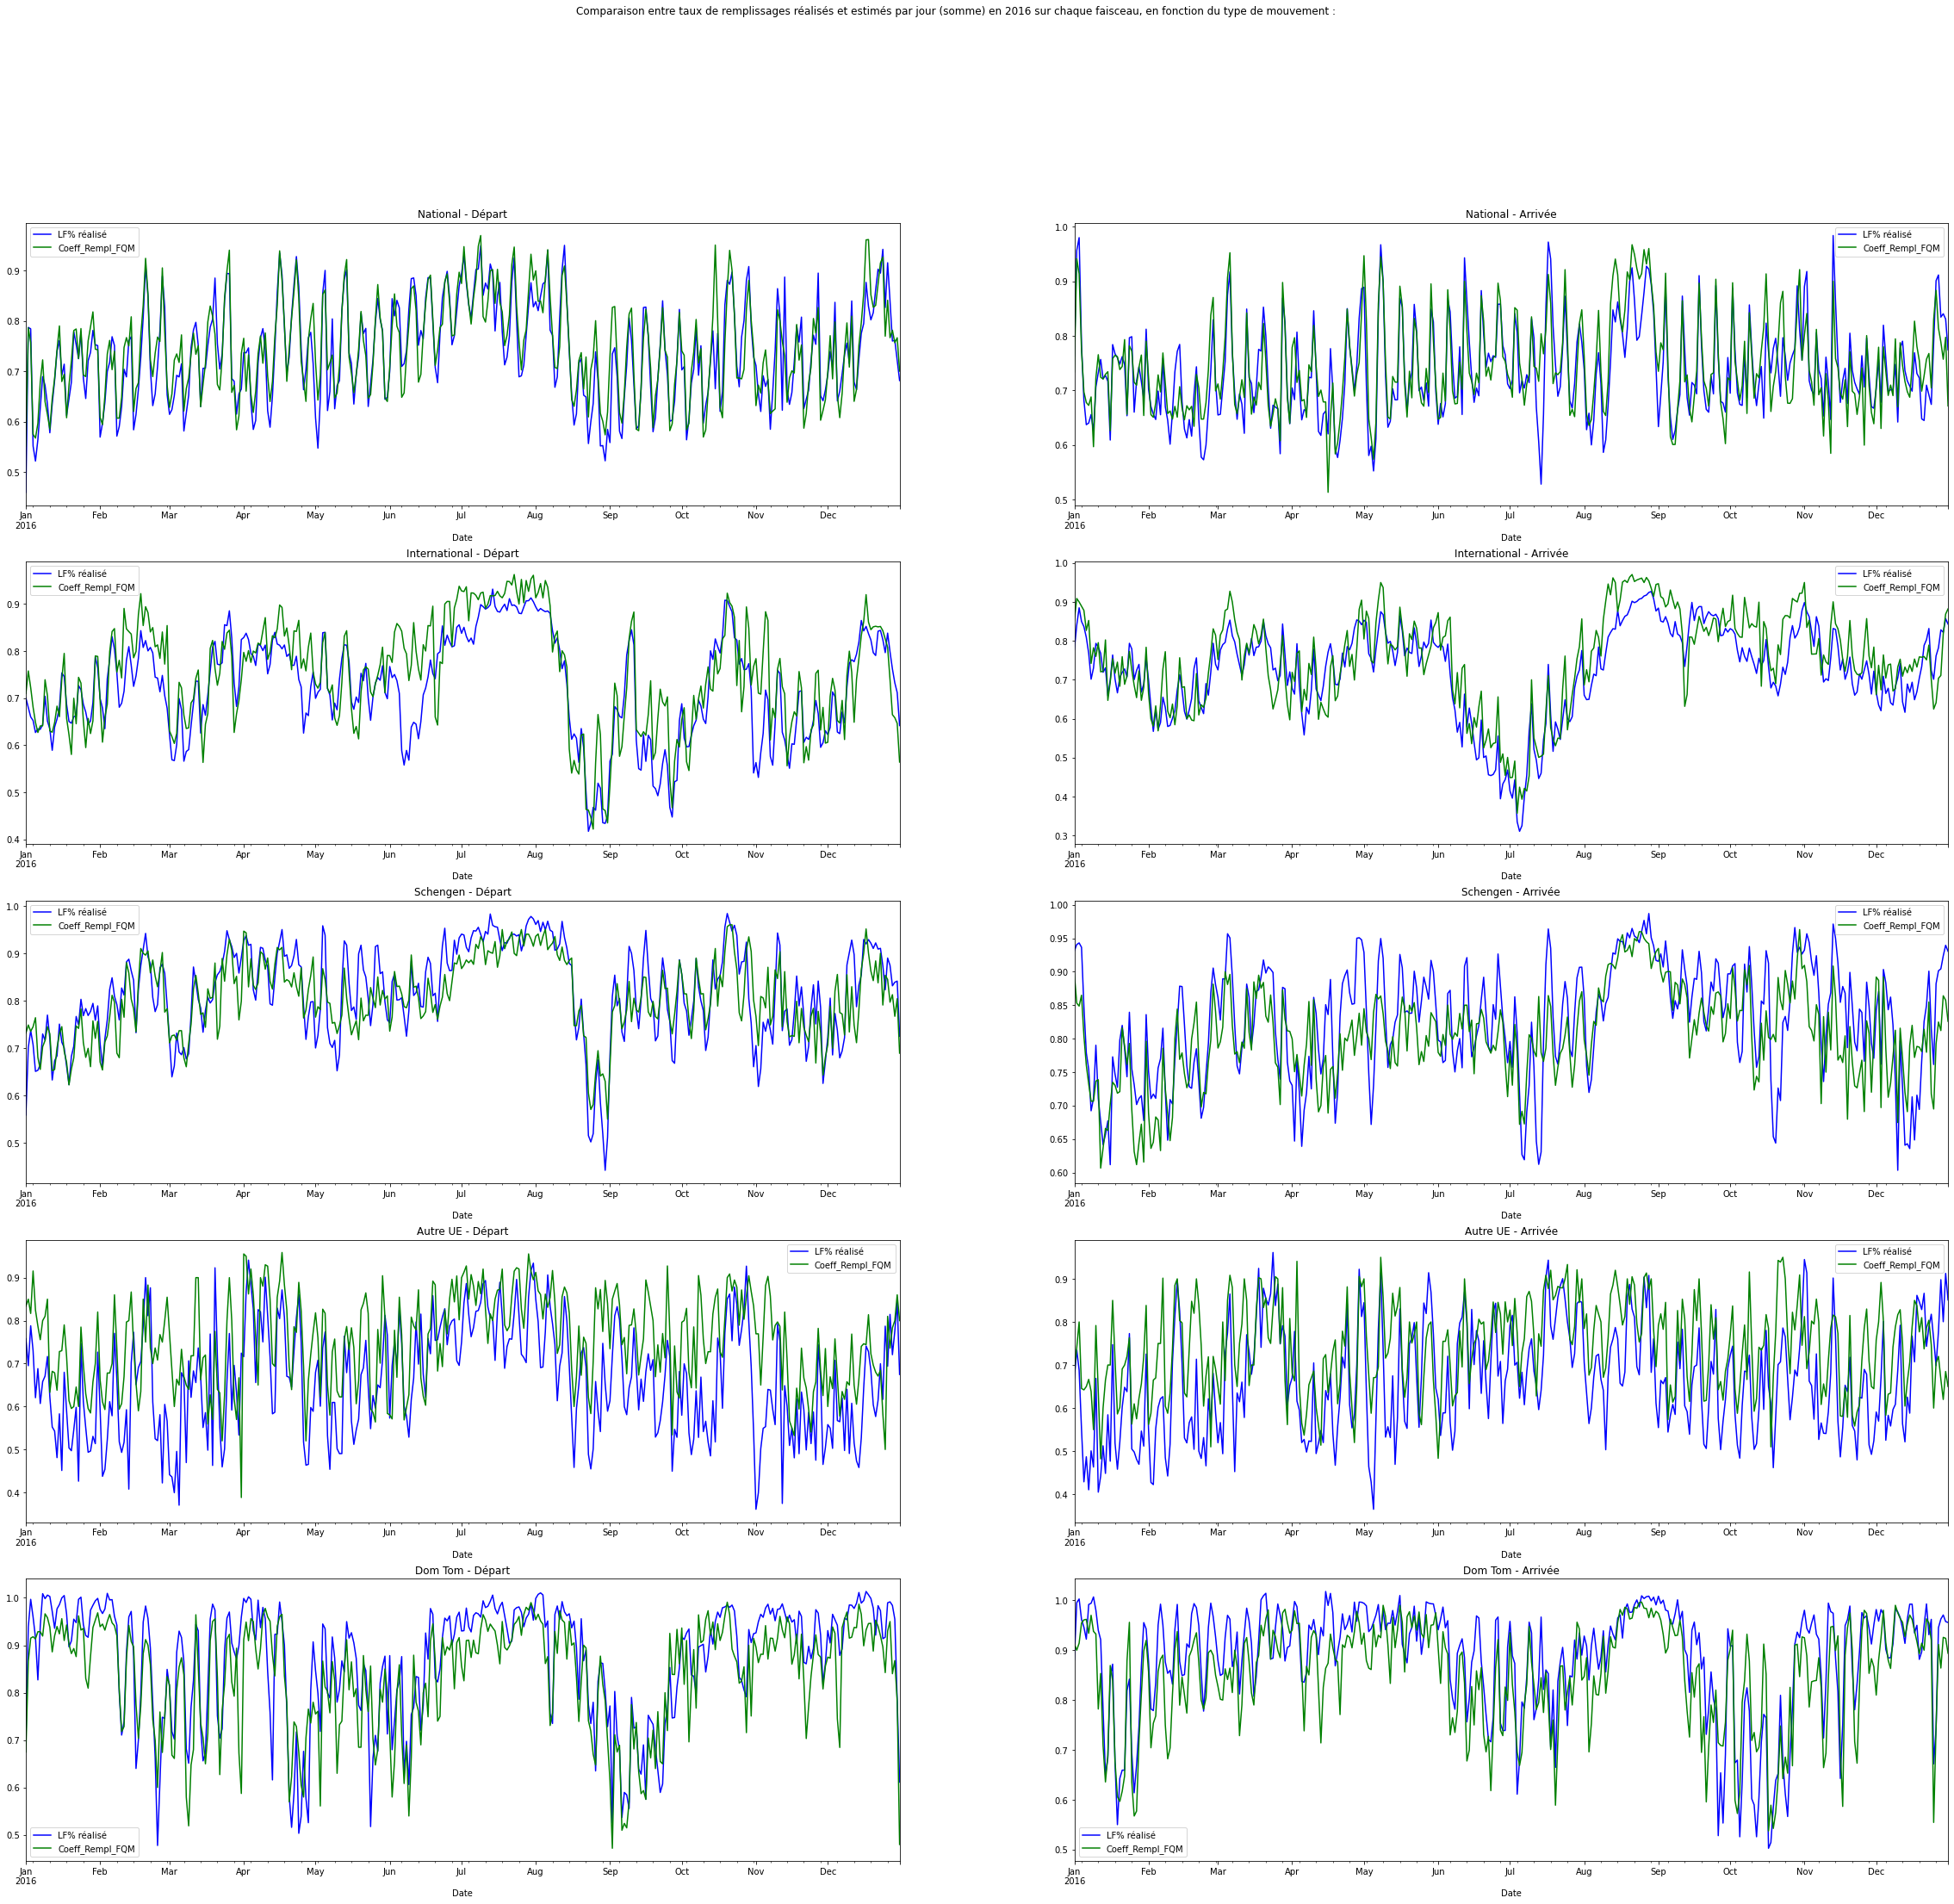

In [89]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    database_orly_depart4[database_orly_depart4['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'LF% réalisé':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    database_orly_depart4[database_orly_depart4['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl_FQM':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    database_orly_arrivee4[database_orly_arrivee4['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'LF% réalisé':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    database_orly_arrivee4[database_orly_arrivee4['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl_FQM':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
fig.suptitle('Comparaison entre taux de remplissages réalisés et estimés par jour (somme) en 2016 sur chaque faisceau, en fonction du type de mouvement :')